In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!pip install keras-resnet

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Project/Dataset_Aug_images/Train/",target_size=(224,224))
tsdata = ImageDataGenerator()
validdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/Project/Dataset_Aug_images/Valid/", target_size=(224,224))

Found 10853 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [0]:
img_height,img_width = 224,224 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("ResNet_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=30,generator=traindata, validation_data= validdata,epochs=30,callbacks=[checkpoint,early])

Epoch 1/30
30/30 [==============================] - 725s 24s/step - loss: 0.6811 - accuracy: 0.8042 - val_loss: 8527026.0000 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to ResNet_2.h5
Epoch 2/30
30/30 [==============================] - 363s 12s/step - loss: 0.3339 - accuracy: 0.8708 - val_loss: 48636.3867 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/30
30/30 [==============================] - 538s 18s/step - loss: 0.2374 - accuracy: 0.8865 - val_loss: 638.3677 - val_accuracy: 0.4970

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/30
30/30 [==============================] - 534s 18s/step - loss: 0.2919 - accuracy: 0.8969 - val_loss: 156.6459 - val_accuracy: 0.5303

Epoch 00004: val_accuracy improved from 0.50000 to 0.53030, saving model to ResNet_2.h5
Epoch 5/30
30/30 [==============================] - 527s 18s/step - loss: 0.2403 - accuracy: 0.9052 - val_loss: 9.8020 - val_accura

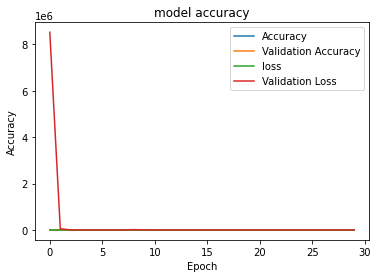

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

#Testing

In [0]:
test_datagen = ImageDataGenerator()
test_data_dir = "/content/drive/My Drive/Project/Test/test/"
print('Total number of images for "testing":')
dataset_test = test_datagen.flow_from_directory(
test_data_dir,
target_size = (224, 224),
batch_size = 10,
class_mode = "categorical",
shuffle=False)

Total number of images for "testing":
Found 256 images belonging to 2 classes.


In [0]:
#Predict accuracy for test set
loss, accuracy = model.evaluate_generator(dataset_test)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.921875  ;  loss = 0.023784 
